- *Análise exploratória de dados de produção solar (Pecém, Ceará)*

In [7]:
import os
import pandas as pd

from src.plotting import *
from src.preprocessing import compile_data

- *Localização estratégica (perto do Porto de Pecém)*

<img src="images/localizacao.png" alt="Localização" style="width: 300px;"/>

- *Motivação... (atraindo investimentos em grande escala)*

<img src="images/motivacao.png" alt="Localização" style="width: 500px;"/>

- *Preparação e tratamento de dados (estimativa de produção solar para uma planta de **3.5MWAc)***

In [8]:
INPUT_DIR = os.path.join(os.getcwd(), "data", "input")

solcast_data = compile_data(
    directory=INPUT_DIR, dataset_name="Solcast", save_data=True
)

- *Cálculo da distribuição horária de energia*

<Figure size 1800x600 with 0 Axes>

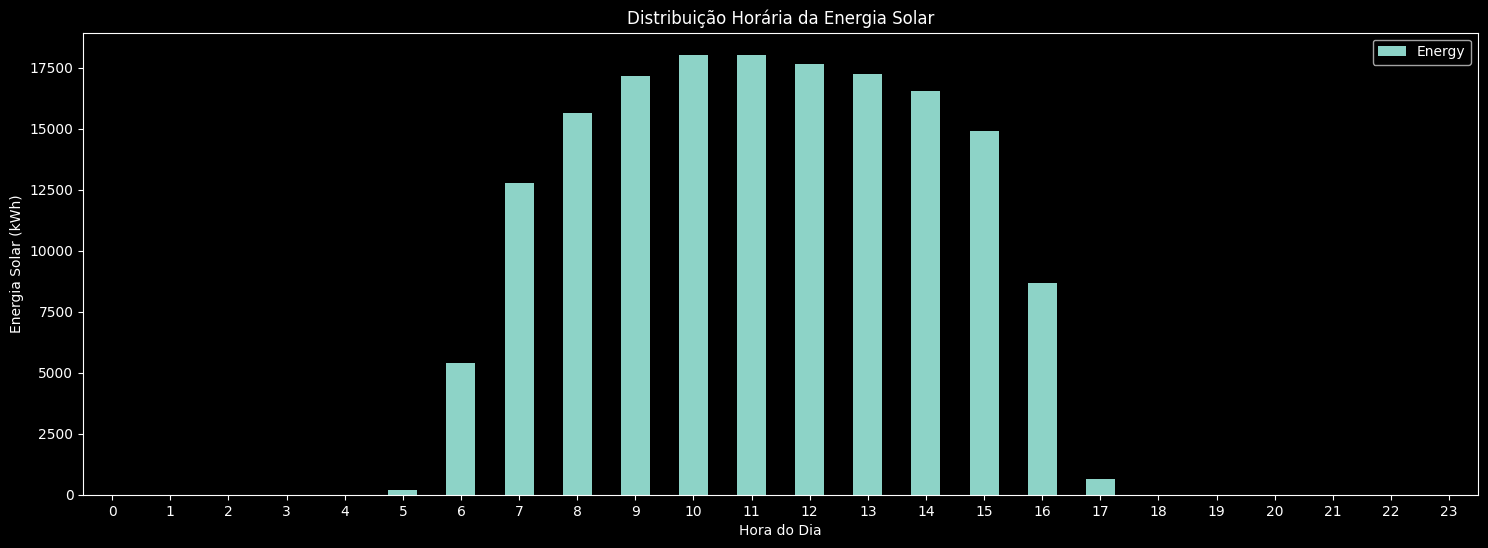

In [9]:
plot_hourly_distribution(data=solcast_data, save_image=True, figsize=(18, 6))

- *Cálculo da distribuição mensal de energia*

<Figure size 1800x600 with 0 Axes>

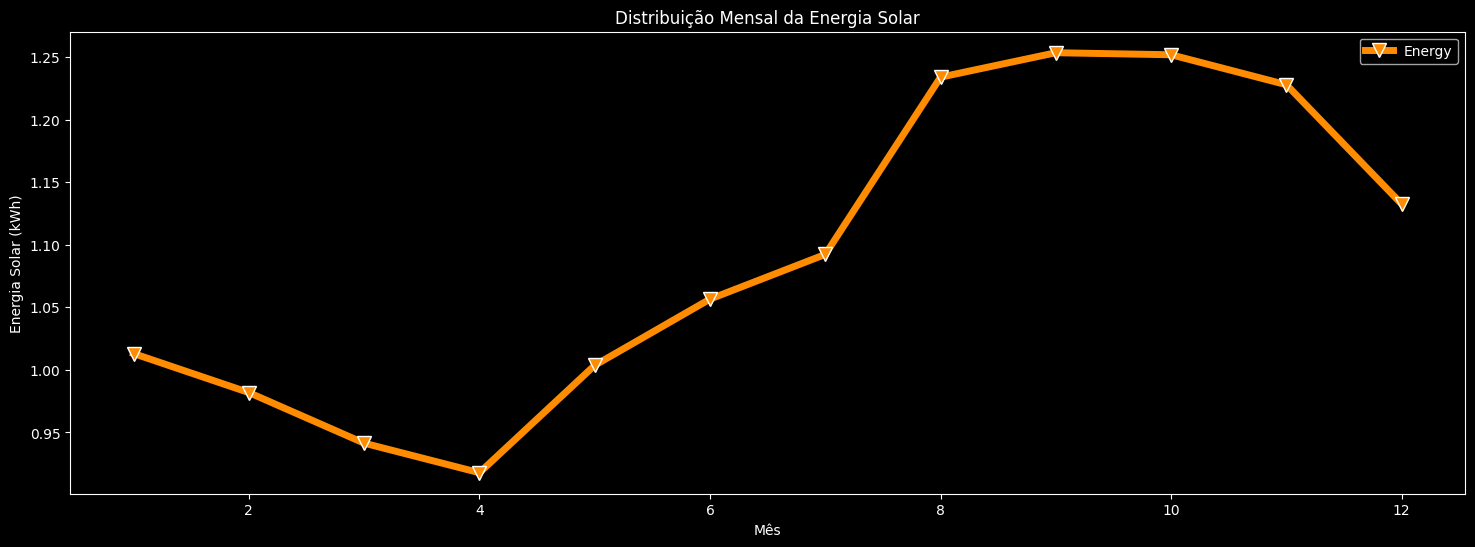

In [10]:
plot_monthly_distribution(
    data=solcast_data,
    save_image=True,
    figsize=(18, 6),
    lw=5,
    color="darkorange",
    marker="v",
    mec="w",
    ms=10,
)

- *Calcular os anos de maior geração solar*

<Figure size 1800x600 with 0 Axes>

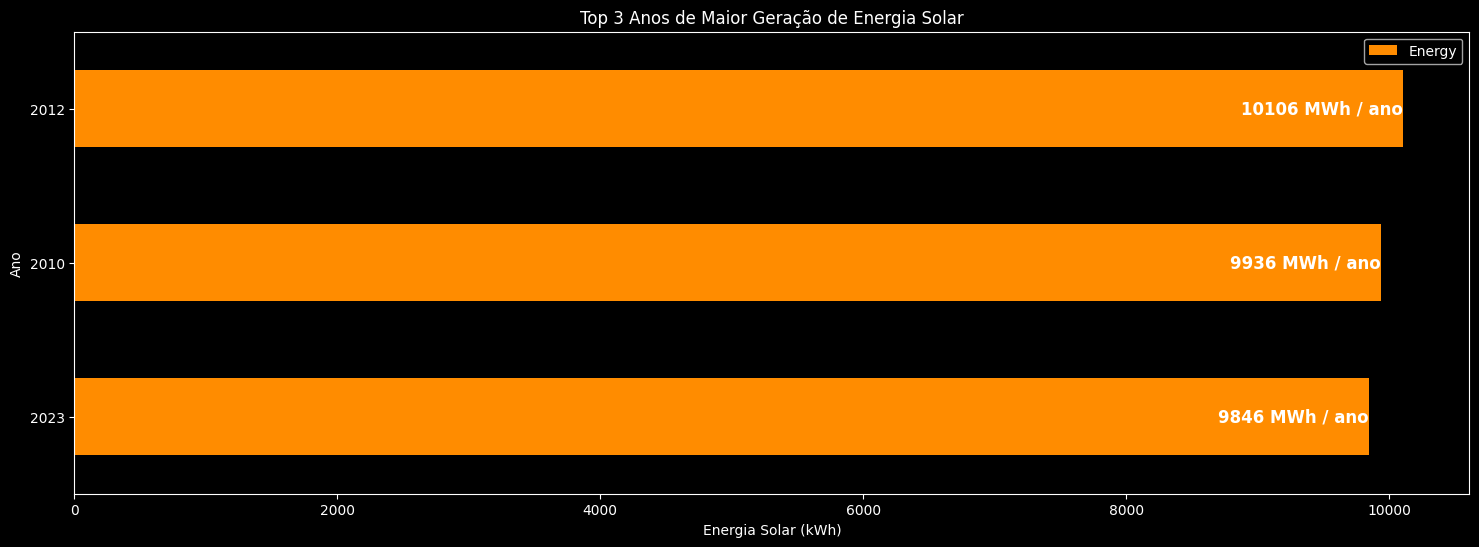

In [11]:
plot_top_years(data=solcast_data, top_n=3, save_image=True, color="darkorange", figsize=(18, 6))

- *Cálculo da intervariabilidade anual*

In [12]:
annual_data = solcast_data.resample("YE").sum()

intervariability = (annual_data.std() / annual_data.mean())["Energy"]*100

print(f"A intervariabiliade anual da produção solar na região é de : {round(intervariability, 1)}%")

A intervariabiliade anual da produção solar na região é de : 3.5%


- *Decomposição da série temporal*

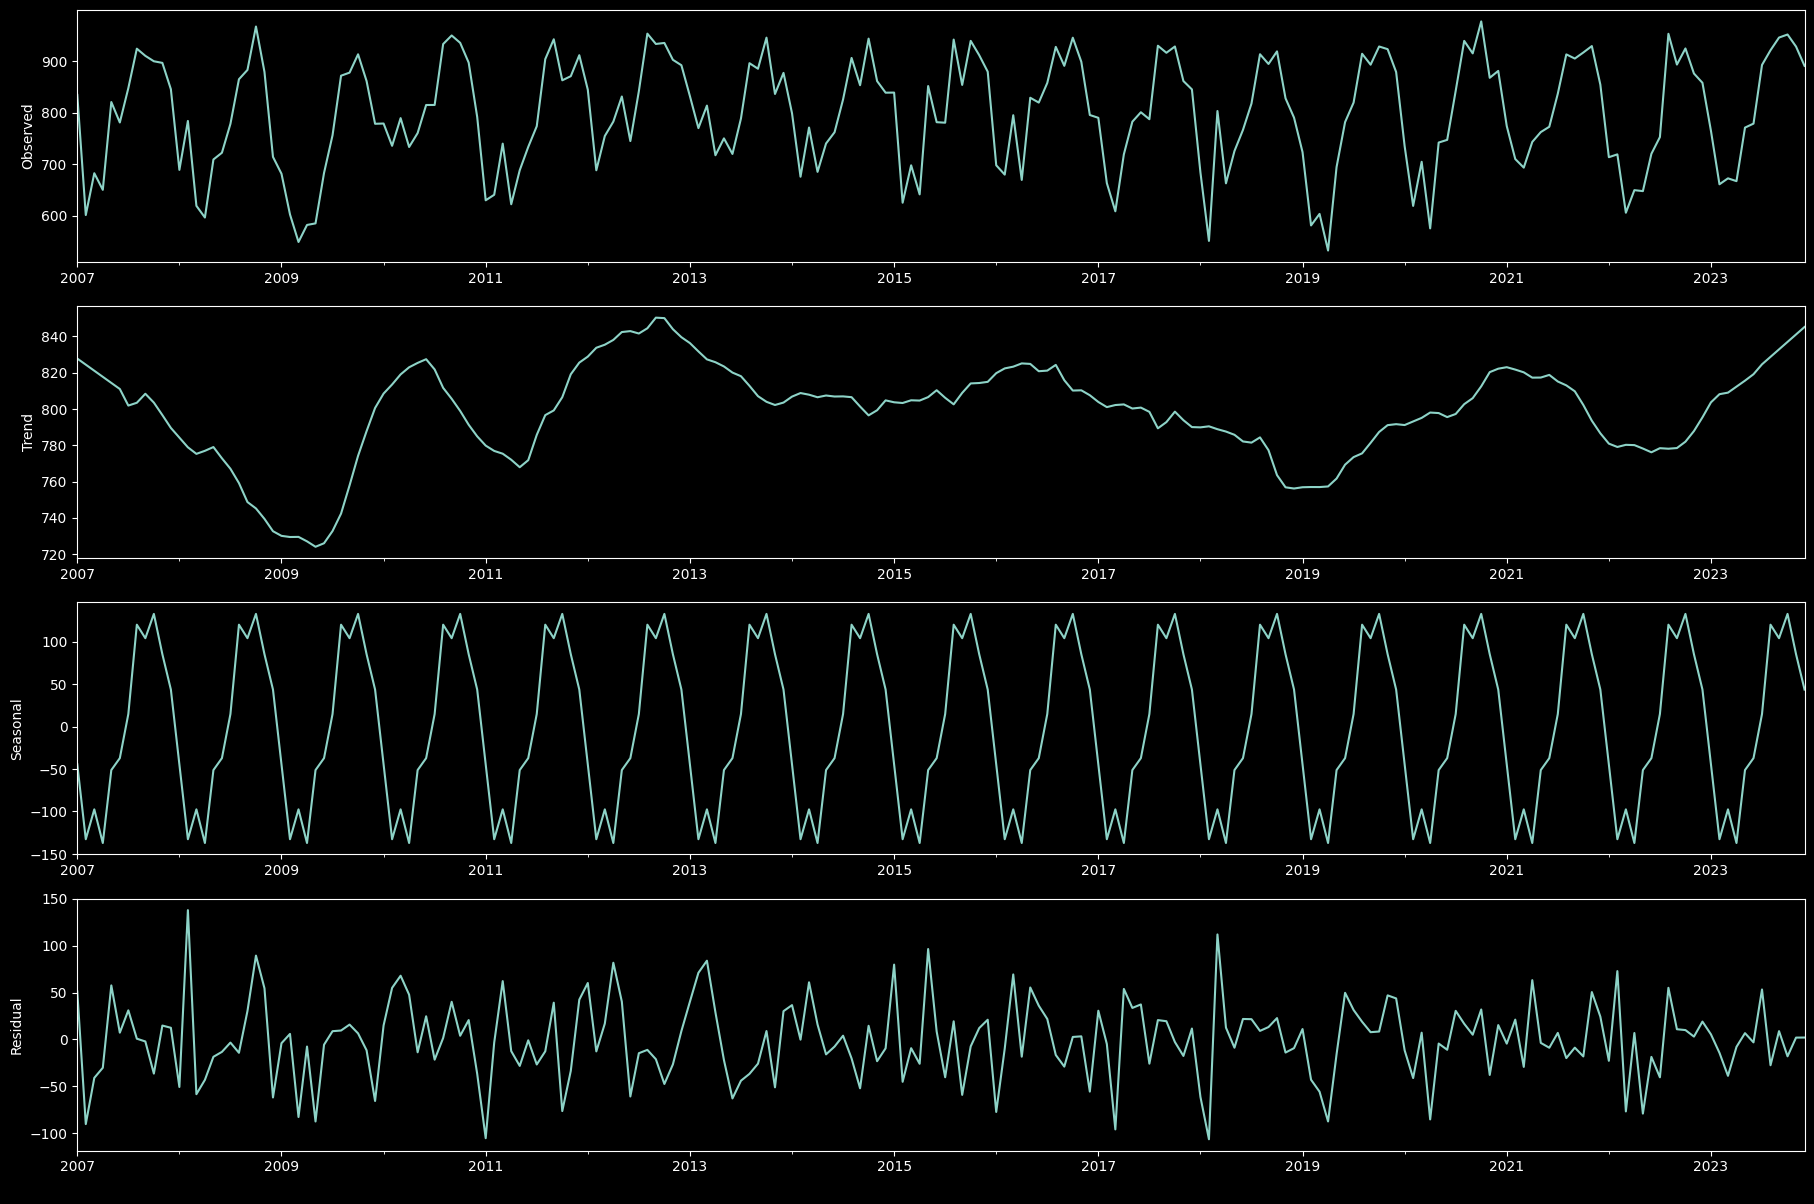

In [13]:
monthly_data = solcast_data.resample("MS").sum()

plot_time_series_decomposition(data=monthly_data, save_image=True)